## 1. Download the training and testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the training and testing data
df_train = pd.read_csv('./hw1-1-data/train.csv') #df = data frame
df_test  = pd.read_csv('./hw1-1-data/test.csv')

df_train.head() #limit by 5 rows 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Show the housing data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Give 3 examples of continuous and categorical features in the dataset
From the train info, we can analyze the features<br>
Continuous features in the dataset - (17)OverallQual, (18)OverallCond, (43)1stFlrSF<br>
Categorical features in the dataset - (2)MSZoning, (12)Neighborhood, (15)BldgType<br>

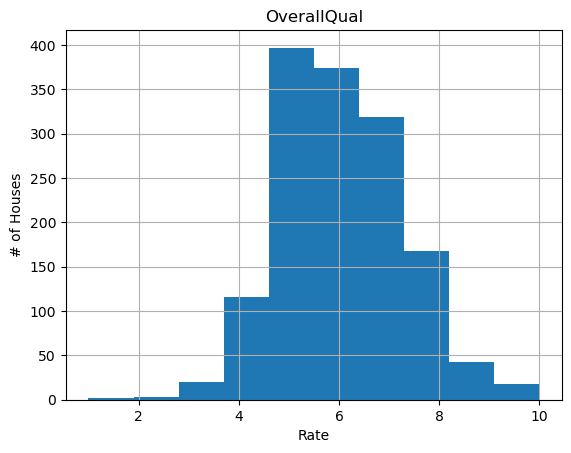

In [3]:
# Plot the OverallQual histogram
df_train['OverallQual'].hist()
plt.title('OverallQual')
plt.xlabel('Rate')
plt.ylabel('# of Houses')
plt.savefig('./hw1-1-data/hist1.png')

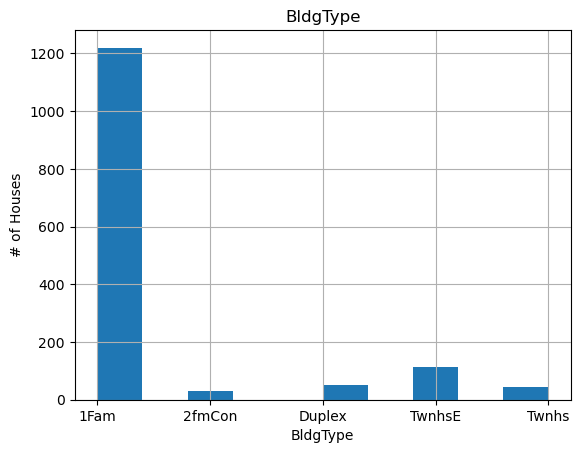

In [4]:
# Plot the BldgType histogram
df_train['BldgType'].hist()
plt.title('BldgType')
plt.xlabel('BldgType')
plt.ylabel('# of Houses')
plt.savefig('./hw1-1-data/hist2.png')

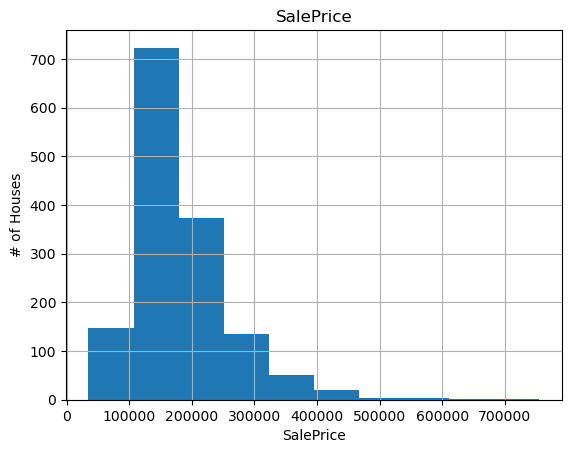

In [5]:
# Plot the SalePrice - to be predicted
df_train['SalePrice'].hist()
plt.title('SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('# of Houses')
plt.savefig('./hw1-1-data/hist3.png')

## 3. Pre-process your data, explain your pre-processing step

In [6]:
# Step 1) Remove the columns that have more than 5% NaN values
drop_column = [] #blank list

for col in df_train.columns:
    if df_train[col].isna().sum() > 0.05 * df_train.shape[0]: # Compare # of NaN data & 5% of the table row
        drop_column.append(col)

print("Drop column: ", drop_column) #print (show) the columns we are going to drop 

df_train.drop(columns=drop_column, inplace=True) #dropping the columns in the dataset
df_train.head()

Drop column:  ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
# Step 2) Remove the columns where one value occupies 90% of data
drop_column = []

for col in df_train.columns:
    if df_train[col].value_counts(normalize=True).max() >= 0.9:
        drop_column.append(col)

print("Drop column: ", drop_column)

df_train.drop(columns=drop_column, inplace=True)
df_train.head()

Drop column:  ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,2,548,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,2,460,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,2,608,0,42,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,3,642,0,35,272,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,3,836,192,84,0,12,2008,WD,Normal,250000


In [8]:
# Merge the training data and testing data
# This is to make the column of the pre-processed testing data same as that of the training data
# df_all doesn't include the 'SalePrice' column

# Find the needed column in df_test data set
df_test_column = df_train.columns.drop('SalePrice')
df_test = df_test[df_test_column]

# Remove the 'SalePrice' column for merging
df_train_drop = df_train.drop(columns = ['SalePrice'])
df_all = pd.concat([df_train_drop, df_test], ignore_index=True)
train_num = df_train.shape[0]

In [9]:
# Step 3) Deal with missing values:
# For the categorical features - Put "MISSING"
# For the numerical features - Put 0

# Split the continuous features and categorical features
cont_column = []
cat_column = []
for col in df_all.columns:
    if df_train[col].dtype == 'object':
        cat_column.append(col)
    else:
        cont_column.append(col)

# Categorical columns
for col in cat_column:
    df_all[col] = df_all[col].fillna('MISSING').astype(str)

# Numerical columns
for col in cont_column:
    df_all[col] = df_all[col].fillna(0)

df_all.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,2.0,548.0,0,61,0,2,2008,WD,Normal
1,2,20,RL,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,1,2.0,460.0,298,0,0,5,2007,WD,Normal
2,3,60,RL,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,1,2.0,608.0,0,42,0,9,2008,WD,Normal
3,4,70,RL,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,1,3.0,642.0,0,35,272,2,2006,WD,Abnorml
4,5,60,RL,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,1,3.0,836.0,192,84,0,12,2008,WD,Normal


In [10]:
# Show the df_all data info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   LotConfig      2919 non-null   object 
 7   Neighborhood   2919 non-null   object 
 8   Condition1     2919 non-null   object 
 9   BldgType       2919 non-null   object 
 10  HouseStyle     2919 non-null   object 
 11  OverallQual    2919 non-null   int64  
 12  OverallCond    2919 non-null   int64  
 13  YearBuilt      2919 non-null   int64  
 14  YearRemodAdd   2919 non-null   int64  
 15  RoofStyle      2919 non-null   object 
 16  Exterior1st    2919 non-null   object 
 17  Exterior2nd    2919 non-null   object 
 18  MasVnrTy

## 4. Use a one-hot encoding for pre-processing categorical features

In [11]:
# Use the get_dummies function for categorical features
#df_train_dummies = pd.get_dummies(df_train[cat_column], dtype='float')
#print(df_train_dummies.shape)

df_all_dummies = pd.get_dummies(df_all[cat_column], dtype='float')
#print(df_all_dummies.shape)

df_all_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_MISSING,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_MISSING,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


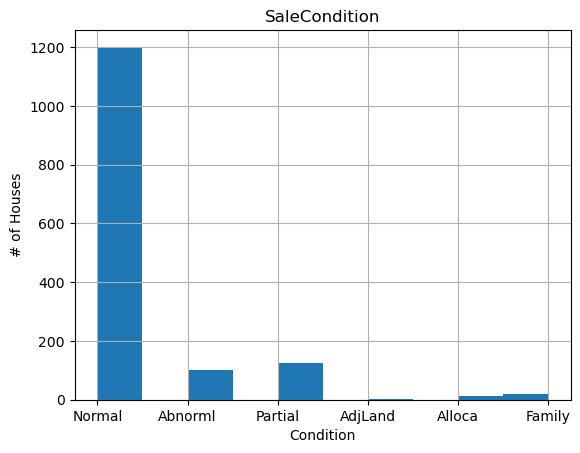

In [12]:
# Plot the SaleCondition histogram
df_train['SaleCondition'].hist()
plt.title('SaleCondition')
plt.xlabel('Condition')
plt.ylabel('# of Houses')
plt.savefig('./hw1-1-data/hist4.png')

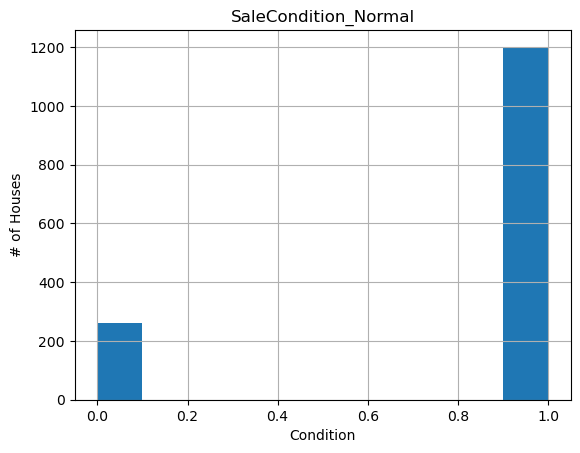

In [13]:
# Plot the SaleCondition_normal histogram
df_train_salecond_normal = df_all_dummies['SaleCondition_Normal'].iloc[:train_num]
df_train_salecond_normal.hist()
plt.title('SaleCondition_Normal')
plt.xlabel('Condition')
plt.ylabel('# of Houses')
plt.savefig('./hw1-1-data/hist5.png')

In [14]:
# Remove the categorical column and add one-hot encoded column
df_all.drop(columns=cat_column, inplace=True)
df_all = pd.concat([df_all, df_all_dummies], axis=1)

df_all.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_MISSING,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5. Use ordinary least squares (OLS) to predict house prices on this dataset

In [16]:

# Get the df_train data set
df_train_final = df_all.iloc[:train_num]

# Put feature variable to X
X = df_train_final
X.head()

# Put response variable to y
y = df_train['SalePrice']

In [19]:
# Split training data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10)

In [20]:
# Calculate the theta_best
import numpy as np
from numpy.linalg import inv, det

theta_best = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [21]:
# Calculate the predicted value from the test set
print(theta_best.shape)
print(X_test.shape)
print(y_test.shape)
y_test_pred = X_test.dot(theta_best)

# Evaluate predictions on the training set using the MSE and the R^2 score
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("R-squared (R²) Score:", r2_score(y_test, y_test_pred))

(203,)
(365, 203)
(365,)
Mean Squared Error (MSE): 866044808.2212745
R-squared (R²) Score: 0.8642602380062404


## 6. Train my model using all of the traning set and test it using the testing data

In [22]:
# Extract the testing data with the used column (after removing unnecessary columns and applying a one-hot encoding)
df_test = df_all.iloc[train_num:]

In [23]:
# Calculate the predicted price
y_test = df_test.dot(theta_best)
#y_test = y_test.fillna(0)

In [24]:
# Make the prediction CSV file
df_predict = pd.DataFrame(y_test).rename(columns={0:'SalePrice'})
df_predict['SalePrice'] = df_predict['SalePrice'].fillna(0)
df_predict['Id'] = df_test['Id']

df_predict.to_csv('./hw1-1-data/test_predict.csv', index=False)